#Uczenie ze wzmocnieniem

Celem tego laboratorium jest zaznajomienie się z koncepcją uczenia ze wzmocnieniem na przykładzie algorytmów Q-Learning.

Poniższy wzór prezentuje podstawowy schemat działania algorytmu Q-Learning.

$$
Q^{new}(s_t,a_t) \gets (1- α) * \underbrace{ Q(s_t,a_t)}_{\text{old value}} +  \underbrace{α}_{\text{learning rate}} *  \overbrace{( \underbrace{r_t}_{reward} +  \underbrace{γ}_{\text{discount factor}} * \underbrace{\max_{a}{Q}(s_{t+1},a))}_{\text{estimated of optimal future value}}}^{\text{learned value}}
$$


## Zastosowania
* inteligentne sterowanie optymalne,
* uczące się roboty,
* gry planszowe,
* optymalizacja kombinatoryczna i szeregowanie.(np. Reakcji cemicznych)

Do najbardziej spektakularnych przykładów należy użycie uczenia się ze wzmocnieniem w połączeniu z reprezentacją funkcji wartości za pomocą sieci neuronowej do gry w trik-traka (backgammon): uzyskany w ten sposób program na podstawie własnej gry (ze sobą) doszedł do mistrzostwa (należy do kilku najlepszych graczy na świecie).
Oraz AlphaGo and AlphaGo Zero, AlphaGo używało sieci wartości (value networks) i przeszukiwało je przy użyciu MCTS monte carlo tree search kiedy  AlphaGo Zero uczenia ze wzmocnieniem. 100 - 0 dla  AlphaGo Zero

## Jak to działa

Zakładamy, że nasz byt uczący się do agent posiadający dwie poniższe zdolności:
* Postrzegania aktualnego stanu środowiska w którym egzystuje. Stan taki oznaczamy zwyczajowo literą **s** (state) z indeksem **t** (time) oznaczającym czas, w którym dany stan miałby być postrzegany. Stanem takim może być np. obraz postrzegany przez kamerę, odczyty z sensorów autonomicznego robota, położenie pionków na planszy do gry…czy nawet treść maila ocenianego przez filtr antyspamowy. Uwaga! Stan postrzegany przez agenta nie musi być pełnym opisem stanu całego środowiska – nie zawsze wiemy co czai się za rogiem.
* Wykonywania akcji, które potencjalnie mają wpływ na stan środowiska i jego miejsce w tymże. Akcje oznaczamy literą **a** (action). Akcją może być wciśnięcie mocniej pedału gazu, przesunięcie figury szachowej, strzał w grze FPS, nawiercenie gruntu…a nawet nie robienie kompletnie niczego (decyzja o bierności również jest decyzją).


Dodatkowo potrzebny jest nam zewnętrzny nadzorca, który potrafi oceniać skutki naszych działań.

*  Za każdym razem gdy w stanie **s** wykonamy akcję **a** nadzorca ocenia skutki takiego działania i przyznaje pewną nagrodę **r** (reward). Nagroda może być ujemna – i zwykle nagrodę taką nazywamy po prostu karą. Nagrody i kary powinny określać pożądane i niepożądane zachowania. Przyznajemy nagrodę za zaparkowanie we właściwym miejscu, fraga, czy zbicie figury bez straty własnej. Przyznajemy karę za stratę bierki, uszkodzenie pojazdu, czy zmarnowane paliwo.


## Q-learning
Q-learning (jak sama nazwa wskazuje) dodaje jeszcze jeden element do układanki: funkcję $Q$ (quality). Dla danej pary „stan i akcja jaką planujemy wykonać” zwraca ona przewidywaną sumę nagród, jakie dostaniemy w przyszłości w konsekwencji wykonania tej akcji. Uwaga! Predykcja ta (szczególnie na początku procesu uczenia) nie musi być trafna i może mocno odbiegać od tego, co wydarzy się w rzeczywistości.
Funkcja Q wyraża właśnie całą zgromadzoną (na bazie wcześniejszych doświadczeń) przez agenta wiedzę.
Jak ją zaimplementować? Na potrzeby tego laboratorium skorzystamy z jednego z najprostszych wariantów – słownika $(s, a) \to r$. W praktyce wykorzystujemy bardziej złożone modele reprezentacji wiedzy – np. wielowarstwową sieć neuronową.


1.    Podejmij decyzję w jaki sposób wybrać następną akcję. Pojawia się pytanie, czy bazować na wcześniejszej wiedzy, czy też wykonać eksperyment. Szansę na ten drugi scenariusz opisuje parametr sterujący $ɛ$ (experiment rate).
   * a  Dla danego stanu $s_t$ rozważ wszystkie możliwe akcje $a$. Wybierz tą, dla której $Q(s_t,a)$ będzie największe. To z punktu widzenia posiadanej wiedzy decyzja racjonalna.
   * b  Ze zbioru dostępnych akcji wybierz losowo akcję $a$. To zaś eksperyment pozwalający na eksplorację nieprzetestowanych jeszcze możliwości.
2. Wykonaj wybraną akcję $a_t$.
3. Zaobserwuj nowy stan środowiska $s_{t+1}$.
4. Otrzymaj nagrodę o wartości $r_t$.
5. Zaktualizuj wartość przypisaną w słowniku do $Q(s_t,a_t)$ w oparciu o wzór podany na początku. Zwróć uwagę na poniższe kwestie.
   * a. Nowa wartość predykcji jest średnią ważoną uprzednio znajdującego się pod tym kluczem wpisu (dotychczasowa wiedza) oraz wniosków z nowego doświadczenia (człon w nawiasie). Stosunek między jednym a drugim (wpływający na to jak „konserwatywny i stabilny w poglądach” jest nasz algorytm) wyraża współczynnik $α$.
   * b. Predykcja składa się z dwóch członów: nagrody już otrzymanej ($r_t$) oraz przewidywanych nagród w kolejnych krokach (definicja jest jak widać rekurencyjna z natury). Ten drugi człon generuje jednak dwa dodatkowe problemy. Po pierwsze jest z definicji mniej wiarygodny (rzeczywista nagroda już „w rękach”, a luźne przewidywania na temat tego jakie nagrody jeszcze nas spotkają). Po drugie zaś (poprzez tą właśnie rekurencyjną zależność) powodowałby on, że wszystkie ścieżki do nagrody są równie dobre, tak długo jak „kiedyś tam” ją dostaniemy. W związku z tym osłabia się wpływ tego składnika wykorzystując współczynnik $γ$.
6. Wykonaj ponownie punkt pierwszy.


Warto zwrócić uwagę, że parametry algorytmu nie muszą być stałe w trakcie całego procesu uczącego. W szczególności $ɛ$ i $α$ powinny startować z dużych wartości (otwartość na nową wiedzę, skłonność do poszukiwań), a następnie spadać (mniej nieodpowiedzialnych eksperymentów, bazowanie na wcześniejszych doświadczeniach).

In [ ]:
!pip install gymnasium

In [ ]:
from collections import defaultdict, deque
import math
import random
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from itertools import product

## Balansowanie kijkiem na wózku
Pierwszy problemem, który rozwiążemy z użyciem Q-Learningu, jest próba utrzymania w pozycji pionowej kijka umieszczonego na poruszającym się wózku (patrz obrazek powyżej). Problem ten
pochodzi z biblioteki Gym gromadzącej zadania testowe dla algorytmów uczących się. W tym celu skorzystamy z umieszczonego w pliku balance.py schematu rozwiązania. Omówmy w zarysie jego zawartość.
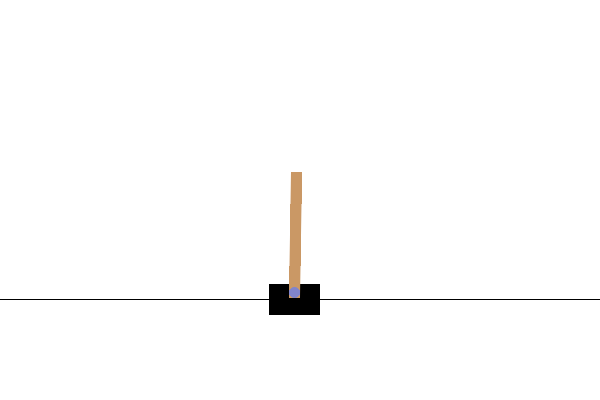

### Omówineine kodu
Init
Tworzymy środowisko na bazie przykładu z biblioteki o nazwie „CartPole-v1”
Ustawiamy licznik prób na 1
Definiujemy górne i dolne granice poszczególnych zmiennych opisujących stan. Będą przydatne podczas jego dyskretyzacji.
* Pierwsza z nich to pozycja wagonika w osi lewo-prawo. Ma ona zakres od -2.4 do 2.4, definiowany przez bibliotekę (i z tego zakresu skorzystamy).
* Druga to prędkość wagonika w tej osi. W teorii może być ona dowolna (stąd zakres od -inf do inf deklarowany przez bibliotekę). W praktyce znacznie wygodniej będzie założyć, że mieści się on między -0.5 a 0.5.
* Trzecia to wychylenie kątowe drążka od pozycji równowagi. Tu również skorzystamy z wartości deklarowanych przez bibliotekę.
* Ostatnią jest prędkość kątowa drążka. Ponownie koniecznie było zawężenie rozważanych wartości do rozsądnego zakresu.

Funkcja main tworzy nowy byt uczący i uruchamia go na 10000 podejść do problemu.

Metoda learn zawiera główną pętlę uczącą. Wykonujemy zadaną liczbę podejść, po każdym z nich wypisując otrzymaną sumę nagród.

Metoda attempt definiuje przebieg jednego podejścia.
* Najpierw resetuje stan środowiska i zeruje zmienną sumującą nagrody.
*  Następnie wybiera akcję do podjęcia.
Deklaruje jej wykonanie i poznaje rezultaty.
* Aktualizuje wiedzę.
* Oraz aktualizuje stan zgromadzonych nagród.
  * W tym problemie dostajemy 1 jednostkę nagrody za każdą iterację w trakcie której kijek nie przewrócił się.
* Kroki te powtarza aż spełniony zostanie jeden z warunków stopu (zmienne terminated, truncated).
  * Pręt przechyli się poniżej granicznego wychylenia kilkunastu stopni.
  * Wagonik wyjedzie poza dozwolony obszar.
  * Uda się utrzymać pręt w pionie przez 500 jednostek czasu. Sukces!


Metoda discretise jest pierwszą z tych, które wymagają właściwej implementacji. Aby skorzystać ze słownika jako reprezentacji wiedzy musimy dokonać dyskretyzacji otrzymanych obserwacji stanu poprzez podział na kubełki. W przeciwnym wypadku nie będzie szans na uczenie się (algorytm musi trafić wielokrotnie na dany klucz w słowniku, by ustalić jego finalną wartość). W końcu pozycja -1.353 to coś zupełnie innego niż -1.357. Możemy jednak reprezentować obie jako np. kubełek numer 3 (od -1.5 do -1.0).

* Ta metoda ma zwracać dla każdej zmiennej opisującej zaobserwowany stan numer kubełka do którego przynależy.
* Obecnie zwraca cztery razy 1 – zakłada istnienie tylko jednego kubełka na każdą zmienną i do niego wrzuca wszystkie obserwacje.
* Musimy ją zaimplementować, by zwracała numery kubełków do których zostały przyporządkowane obserwacje – np. 2, 4, 7, 1.
* Uwaga! Im więcej kubełków tym bardziej „rozrzedzona” jest wiedza (i to wykładniczo!) i tym trudniej cokolwiek nauczyć Q-Learning oparty o słownik. Starajmy się zawsze minimalizować ich liczbę. Dla tego problemu polecam wartości między 2 a 8 kubełków na daną zmienną (sam dobierz ich właściwą liczbę – to jeden z parametrów algorytmu!).


Metoda pick_action  ma za zadanie wybrać kolejną akcję do wykonania zgodnie z punktem 1. opisanego wcześniej schematu algorytmu.
* Na razie jednakże zamiast tego zawsze wybiera losową akcję ze zbioru dostępnych.
* Dostępne są dwie akcje: 0 – popchnij wózek w lewo i 1 – popchnij wózek w prawo. Ją też musimy zaimplementować!

Ostanią do realizacji jest metoda update_knowledge.
* Powinna aktualizować naszą wiedzę (słownik) zgodnie z omówionym schematem.
* Zamiast tego…chwilowo nie robi zupełnie nic.



## Zadanie Uzupełnij luki w kodzie oraz dobierz tak parametry by system działał.


Jeżeli zaimplementujemy wszystko prawidłowo, to nagrody zdobywane przez agenta w kolejnych podejściach powinny systematycznie rosnąć. Optymalne rozwiązanie powinno powtarzalnie uzyskiwać nagrodę 500 jednostek


In [ ]:
class QLearner:
    def __init__(self, alpha, gamma, eps):
        self.environment = gym.make('CartPole-v1', render_mode="none")
        self.attempt_no = 1
        self.upper_bounds = [
            self.environment.observation_space.high[0],
            0.5,
            self.environment.observation_space.high[2],
            math.radians(50),
        ]
        self.lower_bounds = [
            self.environment.observation_space.low[0],
            -0.5,
            self.environment.observation_space.low[2],
            -math.radians(50),
        ]
        self.alpha = alpha
        self.gamma = gamma
        self.eps = eps
        self.epsilon_decay = 1 #popraw mnie
        self.alpha_decay = 1 #popraw mnie
        self.Q = defaultdict(lambda: [random.random(), random.random()])

    def learn(self, max_attempts):
        results = np.zeros(max_attempts // 10)
        memory = deque(maxlen=10)
        for i in range(max_attempts):
            if i > 1000:
                self.eps = max(self.eps * self.epsilon_decay, 0.02)
                self.alpha = max(self.alpha_decay * self.alpha, 0.05)
            reward_sum = self.attempt()
            memory.append(reward_sum)
            if i % 10 == 1:
                results[i // 10] = np.mean(memory)
                print(i, np.mean(memory))
        return results

    def attempt(self):
        observation = self.discretise(self.environment.reset())
        terminated, truncated  = False, False
        reward_sum = 0.0
        while not truncated and not terminated:
            action = self.pick_action(observation)
            new_observation, reward, terminated, truncated, info = self.environment.step(action)
            new_observation = self.discretise(new_observation)
            self.update_knowledge(action, observation, new_observation, reward)
            observation = new_observation
            reward_sum += reward
        self.attempt_no += 1
        return reward_sum

    def discretise(self, observation):
        return (0,0,0,0) #popraw mnie

    def pick_action(self, observation):
        return self.environment.action_space.sample() #popraw mnie

    def update_knowledge(self, action, observation, new_observation, reward):
        pass #popraw mnie

In [ ]:
def main():
    epochs = 2
    iterations = 5000

    X = np.arange(1, iterations + 1, 10)

    counter = 0
    plt.figure(figsize=(24, 12))
    for eps, alfa, gamma in product(
            [0.0],#popraw mnie
            [0.0],#popraw mnie
            [0.0 ]#popraw mnie
    ):
        rewards = np.zeros(shape=(epochs, iterations // 10))
        counter += 1

        for i in range(epochs):
            actor = QLearner(alfa, gamma, eps)
            rewards[i] = actor.learn(iterations)

        name = f"Alfa={alfa}, Gamma={gamma}, Eps={eps}"
        print(counter, name)
        _mean = np.mean(rewards, axis=0)
        _std = np.std(rewards, axis=0)

        plt.subplot(2, 2, counter)
        plt.title(name)
        plt.xlabel("Iteration")
        plt.ylabel("Mean reward last 10 games")
        plt.plot(X, _mean, color="blue")
        plt.fill_between(X, _mean - _std, _mean + _std, color="blue", alpha=.1)

    plt.show()

In [ ]:
main()

# Sarsa
Algorytm SARSA (nie mylić z piosenkarką, skrót od state–action–reward–state–action) jest wariantem
Q-Learning korzystającym z delikatnie zmodyfikowanego schematu uczenia, opisane poniższym
wzorem.

$$
Q^{new}(s_t,a_t) \gets   Q(s_t,a_t) +  α *  [r_t +  γ * Q(s_{t+1},a_{t+1}) -  Q(s_t,a_t)]
$$

Zwróć uwagę, że człon opisujący przyszłe zyski nie zawiera teraz maksimum po możliwych akcjach, $a$
rzeczywistą akcję $a_{t+1}$ podjętą w iteracji kolejnej po iteracji $t$. Ma to dwie konsekwencje.
* Algorytm uwzględnia zagrożenia związane z tym, że wykonywana akcja nie zawsze jest tą
optymalną (bo przecież jest szansa na eksperyment). Stany w których losowy wybór akcji
wiąże się z potencjalnie dużą karą (potocznie „kroczenie nad brzegiem przepaści” – jedna-
dwie nieoptymalne akcje mogą skończyć się tragedią) będą niepożądane.
* Aby zaktualizować wiedzę konieczna jest znajomość zarówno akcji $a_t$, jak i kolejnej $a_{t+1}$. W
kroku uczenia należy pamiętać je obie (a nie tylko ostatnią)

# Zadanie
Zmodyfikuj kod, by realizował algorytm SARSA. Porównaj jego
działanie (dla wybranej grupy parametrów) z działaniem Q-Learning

## Lądowanie na księżycu
Ostatnim krokiem jest wykorzystanie poznanego algorytmu do próby rozwiązania trudniejszego
problemu – sterowania lądownikiem księżycowym. W bibliotece Gym jest on nazwany „LunarLander-v2".
Zaadaptuj istniejący kod do
walki z tym zadaniem i wyląduj (umiarkowanie) bezpiecznie na księżycu!
* Możliwe akcje to: uruchom lewą dyszę sterującą, uruchom prawą dyszę, uruchom dolną
dyszę, nie rób niczego.
* Dobierz przedział rozważanych wartości i ziarnistość dyskretyzacji do nowych obserwacji
środowiska.
o W tym celu warto wykonać szybki histogram wartości otrzymywanych w trakcie
losowego lotu.
o Przydaje się też przejrzenie kodu źródłowego problemu.
* Uczenie musi przebiegać znacząco wolniej i dłużej – to nie jest łatwy problem dla tak
uproszczonego algorytmu.
* Powinno się jednak udać uzyskać dodatnie nagrody (rzędu 50 jednostek) – a jeżeli nie, to
przynajmniej mniejsze kary niż przy losowym zachowaniu.
* Skuteczna procedura ucząca z wykorzystaniem komputera osobistego może być
czasochłonna (kilka h).

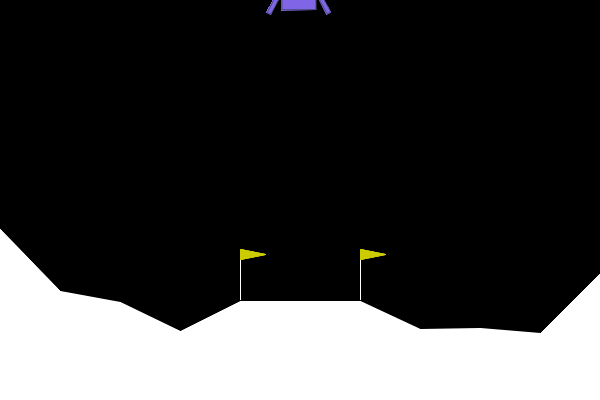